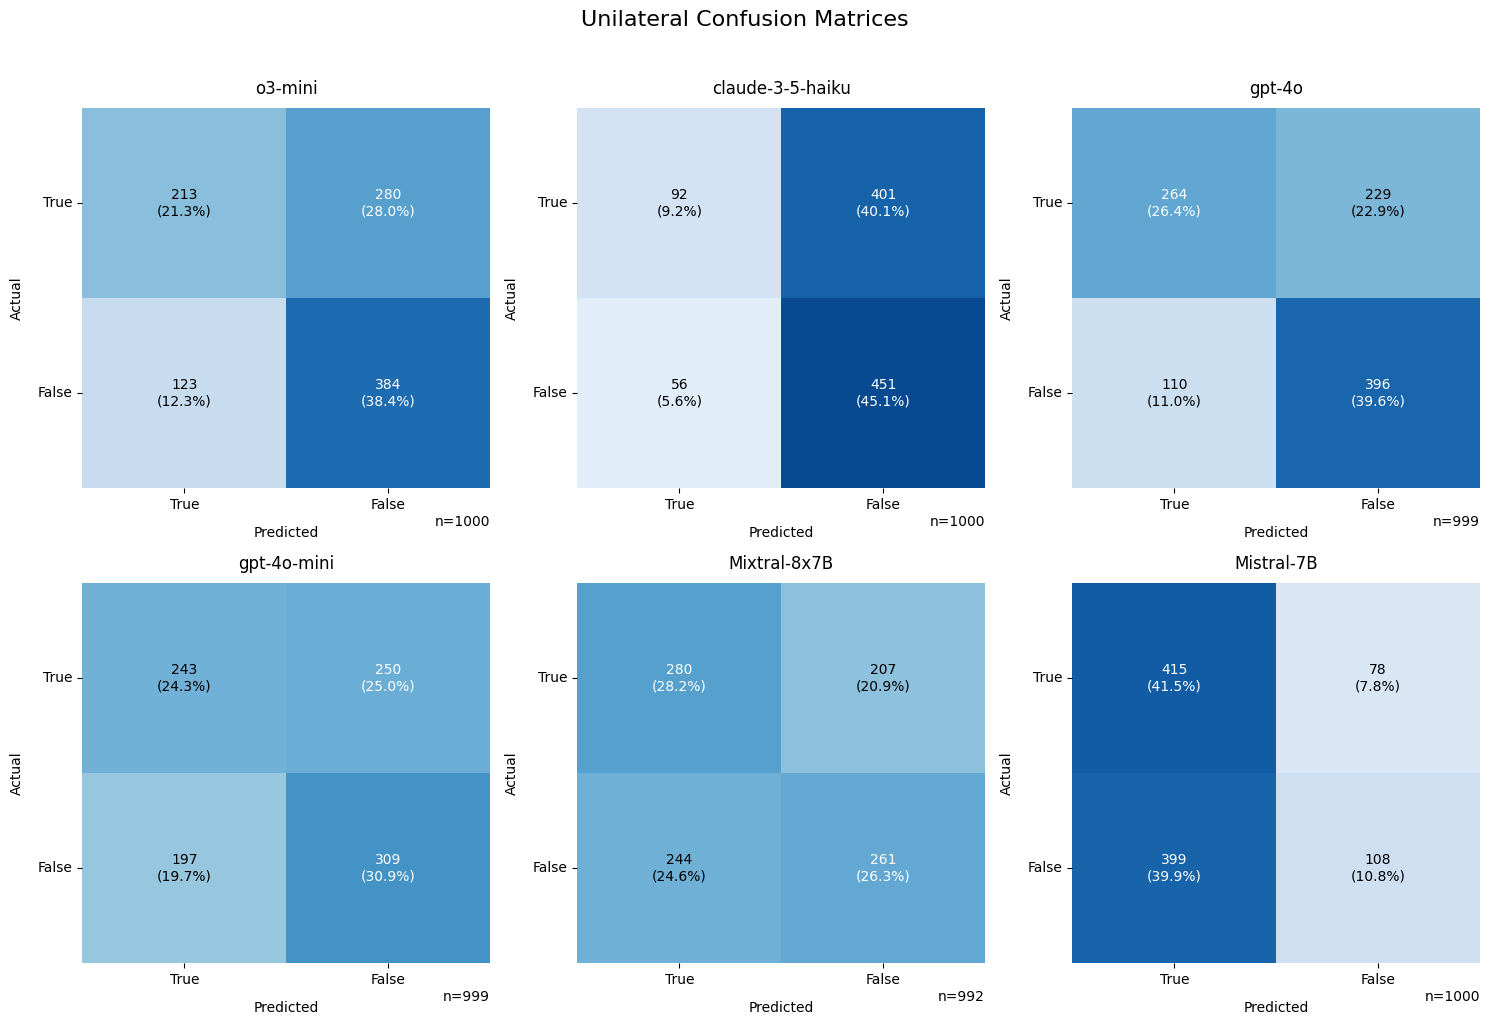

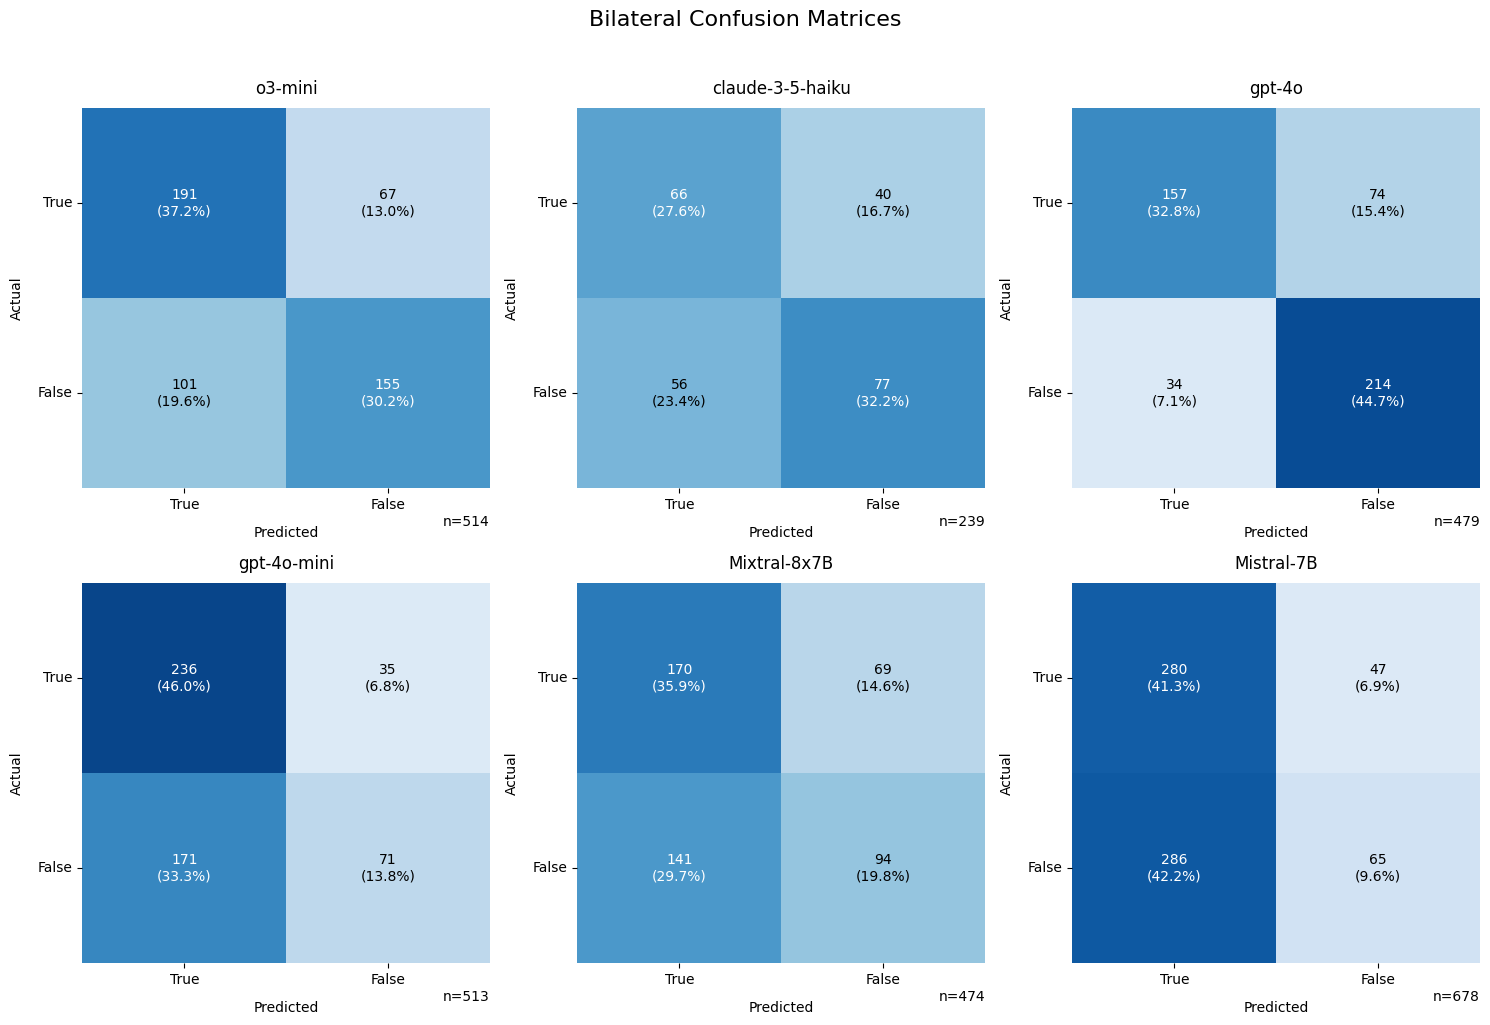

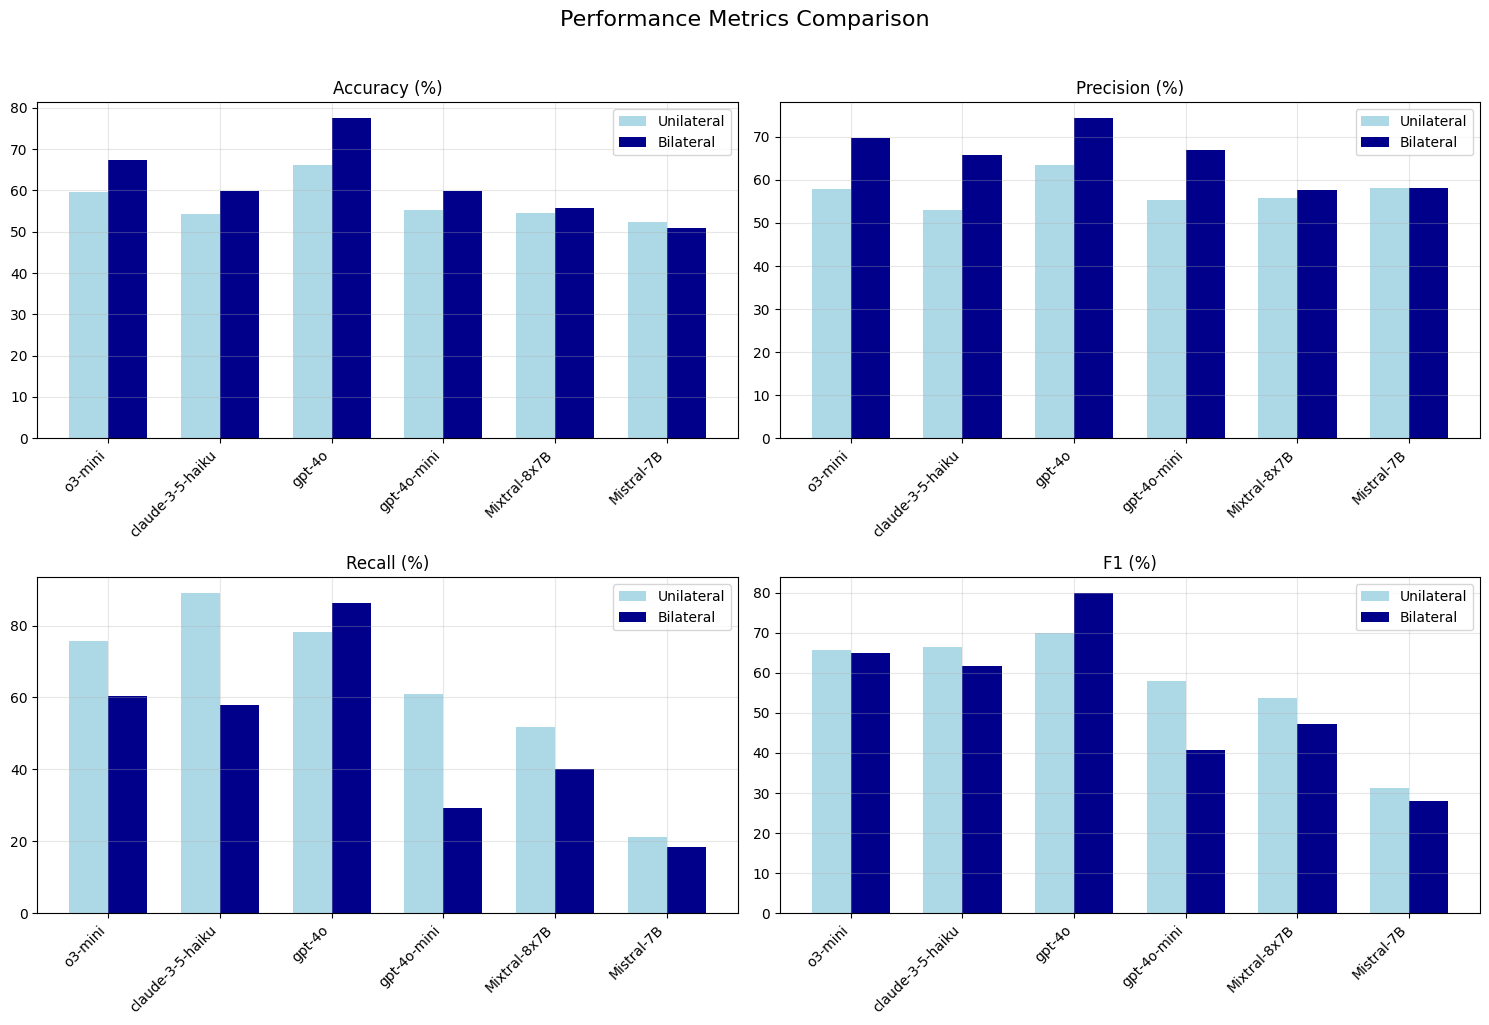

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for models
unilateral_data = {
    'o3-mini': np.array([[213, 280], [123, 384]]),
    'claude-3-5-haiku': np.array([[92, 401], [56, 451]]),
    'gpt-4o': np.array([[264, 229], [110, 396]]),
    'gpt-4o-mini': np.array([[243, 250], [197, 309]]),
    'Mixtral-8x7B': np.array([[280, 207], [244, 261]]),
    'Mistral-7B': np.array([[415, 78], [399, 108]])
}

bilateral_data = {
    'o3-mini': np.array([[191, 67], [101, 155]]),
    'claude-3-5-haiku': np.array([[66, 40], [56, 77]]),
    'gpt-4o': np.array([[157, 74], [34, 214]]),
    'gpt-4o-mini': np.array([[236, 35], [171, 71]]),
    'Mixtral-8x7B': np.array([[170, 69], [141, 94]]),
    'Mistral-7B': np.array([[280, 47], [286, 65]])
}

def plot_confusion_matrices(data, title):
    n_models = len(data)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(title, fontsize=16, y=1.02)
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for idx, (model_name, matrix) in enumerate(data.items()):
        ax = axes[idx]
        
        # Calculate percentages
        total = matrix.sum()
        matrix_pct = matrix / total * 100
        vmax = 50  # Max percentage to expect

        # Create the base heatmap without annotations
        sns.heatmap(matrix_pct,
                   annot=False,
                   cmap='Blues',
                   vmin=0,
                   vmax=vmax,
                   cbar=False,
                   ax=ax)

        # Add custom annotations with both count and percentage
        for i in range(2):
            for j in range(2):
                count = matrix[i, j]
                percentage = matrix_pct[i, j]
                text = f'{count}\n({percentage:.1f}%)'
                
                # Calculate text color based on background darkness
                color = 'white' if matrix_pct[i, j] > 25 else 'black'
                
                ax.text(j + 0.5, i + 0.5, text,
                       ha='center',
                       va='center',
                       color=color,
                       fontsize=10)
        # Customize appearance
        ax.set_title(f'{model_name}', pad=10)
        ax.set_xlabel('Predicted', labelpad=10)
        ax.set_ylabel('Actual', labelpad=10)
        
        # Set tick labels
        ax.set_xticklabels(['True', 'False'])
        ax.set_yticklabels(['True', 'False'], rotation=0)
        
        # Add total count as text
        total = matrix.sum()
        ax.text(1.0, -0.1, f'n={total}', transform=ax.transAxes, ha='right')
        
    plt.tight_layout()
    return fig

# Create visualizations
fig1 = plot_confusion_matrices(unilateral_data, 'Unilateral Confusion Matrices')
fig2 = plot_confusion_matrices(bilateral_data, 'Bilateral Confusion Matrices')

# Function to calculate metrics
def calculate_metrics(data):
    metrics = []
    for model, matrix in data.items():
        tn, fp, fn, tp = matrix.ravel()
        total = matrix.sum()
        
        accuracy = (tp + tn) / total
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)
        
        metrics.append({
            'Model': model,
            'Accuracy': accuracy * 100,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1': f1 * 100
        })
    return metrics

# Plot metrics comparison
def plot_metrics_comparison(unilateral_metrics, bilateral_metrics):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Performance Metrics Comparison', fontsize=16, y=1.02)
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    for idx, metric in enumerate(metrics):
        ax = axes.flatten()[idx]
        
        # Extract data
        models = [m['Model'] for m in unilateral_metrics]
        uni_vals = [m[metric] for m in unilateral_metrics]
        bi_vals = [m[metric] for m in bilateral_metrics]
        
        x = np.arange(len(models))
        width = 0.35
        
        # Create bars
        ax.bar(x - width/2, uni_vals, width, label='Unilateral', color='lightblue')
        ax.bar(x + width/2, bi_vals, width, label='Bilateral', color='darkblue')
        
        # Customize appearance
        ax.set_title(f'{metric} (%)')
        ax.set_xticks(x)
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
    plt.tight_layout()
    return fig

# Calculate and plot metrics
unilateral_metrics = calculate_metrics(unilateral_data)
bilateral_metrics = calculate_metrics(bilateral_data)
fig3 = plot_metrics_comparison(unilateral_metrics, bilateral_metrics)